In [ ]:
import scanpy as sc
import decoupler as dc
import anndata as ad

In [50]:
adata = ad.read_h5ad("D:\\studium\\LR2TF_HiWi\\decoupler_test\\anndata_object.h5ad")
print(adata)

net = dc.get_collectri(organism='human', split_complexes=False)
print(net)

dc.run_ulm(
    mat=adata,
    net=net,
    source='source',
    target='target',
    weight='weight',
    verbose=True,   
    use_raw = False
)
adata.obs["seurat_clusters"] = adata.obs["seurat_clusters"].cat.remove_categories("8")
acts = dc.get_acts(adata, obsm_key='ulm_estimate')

acts.obs["seurat_clusters"]
new_names = ["Naive CD4 T", "Memory CD4 T", "CD14+ Mono", "B", "CD8 T", "FCGR3A+ Mono", "NK", "DC"]
acts.obs["seurat_clusters"]= acts.obs["seurat_clusters"].cat.rename_categories(new_names)

df = dc.rank_sources_groups(acts, groupby='seurat_clusters', reference='rest', method='t-test_overestim_var')
#

AnnData object with n_obs × n_vars = 160 × 8674
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.5', 'seurat_clusters'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_umap'
       source          target  weight  \
0         MYC            TERT       1   
1        SPI1           BGLAP       1   
2       SMAD3             JUN       1   
3       SMAD4             JUN       1   
4      STAT5A             IL2       1   
...       ...             ...     ...   
43173    NFKB  hsa-miR-143-3p       1   
43174     AP1     hsa-miR-206       1   
43175    NFKB   hsa-miR-21-5p       1   
43176    NFKB  hsa-miR-224-5p       1   
43177     AP1     hsa-miR-144       1   

                                                    PMID  
0      10022128;10491298;10606235;10637317;10723141;1...  
1                                               10022617  
2                                      10022869;12374795  
3       

100%|██████████| 1/1 [00:00<00:00, 15.92it/s]


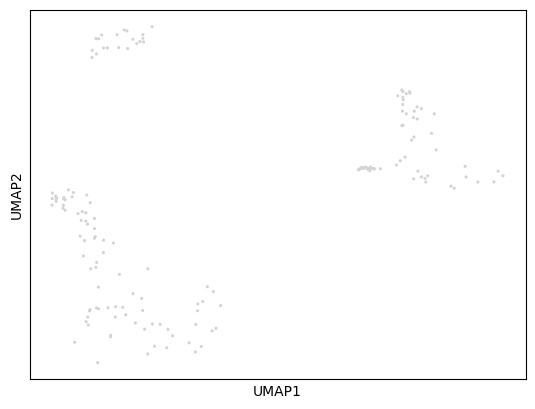

In [41]:
sc.pl.umap(adata,size=20, show=True, legend_loc=None)

In [ ]:
# 0: Naive CD4 T
# 1: Memory CD4 T
# 2: CD14+ Mono
# 3: B
# 4: CD8 T
# 5: FCGR3A+ Mono
# 6: NK
# 7: DC

         Falling back to preprocessing with `sc.pp.pca` and default params.


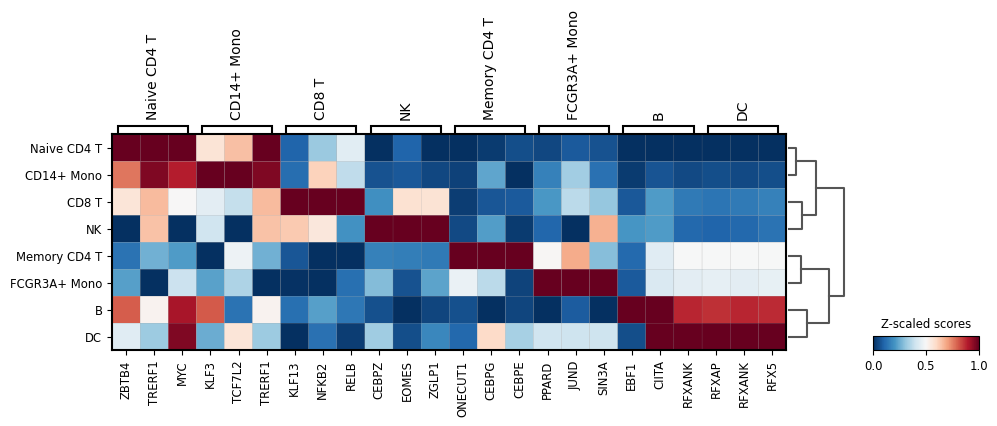

In [ ]:
n_markers = 3
source_markers = df.groupby('group').head(n_markers).groupby('group')['names'].apply(lambda x: list(x)).to_dict()



sc.pl.matrixplot(acts, source_markers, 'seurat_clusters', dendrogram=True, standard_scale='var',
                 colorbar_title='Z-scaled scores', cmap='RdBu_r')

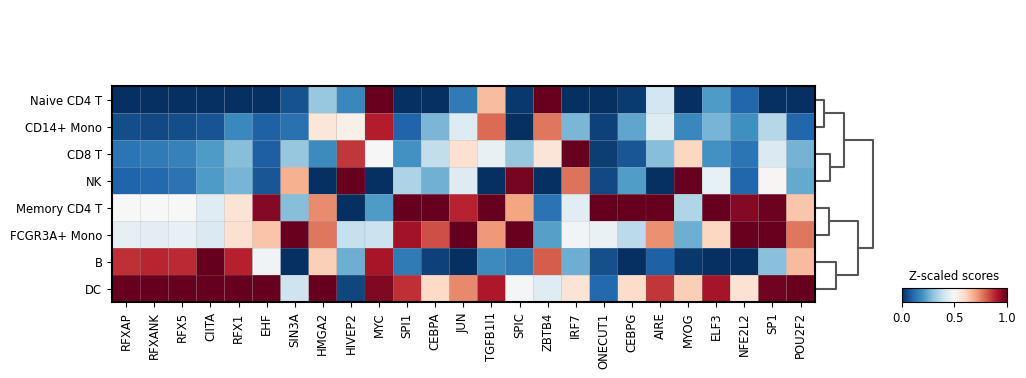

In [59]:
gene_variability = pd.DataFrame(acts.X, index=acts.obs.index, columns=acts.var_names).std(axis=0)
top_25_genes = gene_variability.nlargest(25).index

# Update TF selection
tfs = top_25_genes


sc.pl.matrixplot(acts, tfs, 'seurat_clusters', dendrogram=True, standard_scale='var',
                 colorbar_title='Z-scaled scores', cmap='RdBu_r')

{'B': ['EBF1', 'CIITA', 'RFXANK'],
 'CD14+ Mono': ['KLF3', 'TCF7L2', 'TRERF1'],
 'CD8 T': ['KLF13', 'NFKB2', 'RELB'],
 'DC': ['RFXAP', 'RFXANK', 'RFX5'],
 'FCGR3A+ Mono': ['PPARD', 'JUND', 'SIN3A'],
 'Memory CD4 T': ['ONECUT1', 'CEBPG', 'CEBPE'],
 'NK': ['CEBPZ', 'EOMES', 'ZGLP1'],
 'Naive CD4 T': ['ZBTB4', 'TRERF1', 'MYC']}

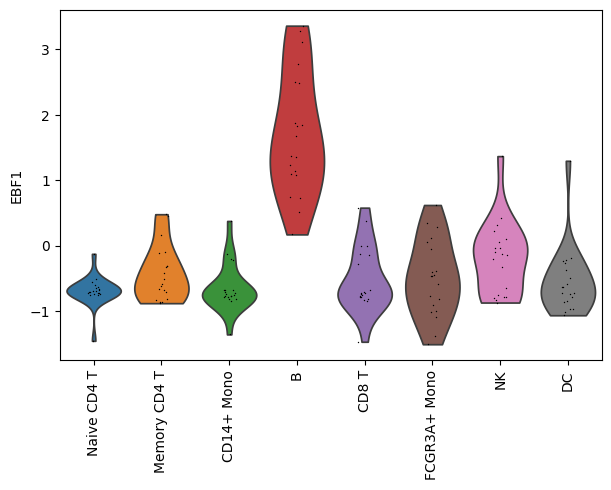

In [52]:
sc.pl.violin(acts, keys=['EBF1'], groupby='seurat_clusters', rotation=90)